## Simulating the SASE Spectrum

**Input Parameters:**
- $\omega$: Frequency domain array, **specified by the user**.
- $\bar{I}(\omega)$: Measured average spectrum, **specified by the user**.
- $F_0(t)$: Temporal filtering function, **specified by the user** based on expected pulse shapes (e.g., Gaussian if not otherwise indicated).
- `duration`: Duration of the FEL pulse, **specified by the user** to define the width of $F_0(t)$.

**Output:**
- $E_f(t)$: Simulated temporal electric field after applying temporal filtering.

**Steps:**

1. **Define Initial Spectrum:**
   - For each frequency $\omega_i$ in the frequency domain array $\omega$:
     - Calculate $A_0(\omega_i) = \sqrt{\bar{I}(\omega_i)}$ to obtain the amplitude from the measured spectrum.
     - Generate a random phase $\phi_0(\omega_i)$ uniformly distributed between $-\pi$ and $\pi$. These phases are randomly generated within the algorithm to mimic the stochastic nature of real pulses.
     - Define the initial complex spectrum $E_0(\omega) = A_0(\omega) \cdot \exp(i \cdot \phi_0(\omega))$.

2. **Fourier Transform to Time Domain:**
   - Compute the inverse Fourier transform of $E_0(\omega)$ to convert it from the frequency domain to the time domain. This results in $E_0(t)$, where the Fourier transform calculations are handled by a numerical library (e.g., FFT functions in Python).

3. **Apply Temporal Filtering:**
   - The temporal filtering function $F_0(t)$ uses the `duration` to scale its width, typically matching the known or expected FWHM of the pulse.
   - Multiply $E_0(t)$ by $F_0(t)$ to obtain the filtered temporal field $F(t) = E_0(t) \cdot F_0(t)$, where the multiplication is element-wise across the time domain signal.

4. **Final Temporal Electric Field:**
   - The final temporal electric field $E_f(t)$ is calculated as $F(t)$, which represents the electric field of the FEL pulse after applying the temporal characteristics of the pulse via the filtering process.

5. **Normalization (Optional):**
   - If normalization is required (for example, to ensure the total power is consistent between simulations), adjust $E_f(t)$ accordingly. This might involve scaling $E_f(t)$ so that the integral over its squared magnitude equals one.

6. **Repeat for Different Pulses (if required):**
   - To simulate multiple pulses, especially in scenarios where stochastic variation is significant (e.g., in an experimental setting), repeat steps 1-5 for each pulse, generating new random phases for each simulation.

This algorithm provides a comprehensive framework for simulating the temporal electric field of an FEL pulse, incorporating essential physical characteristics such as random phase noise and temporal filtering. By allowing for user specifications and built-in calculations, it offers flexibility and precision suited for advanced photonics research and development.


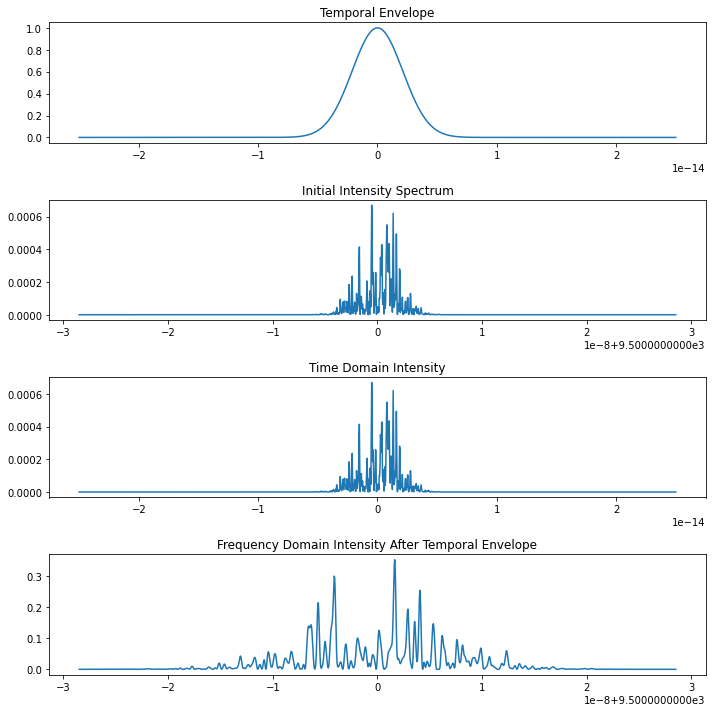

In [2]:
import numpy as np
from phenom.spectrum import linear_SASE_spectrum
# Example usage with plotting enabled
t = np.linspace(-25e-15, 25e-15, 1500)
spectrum = linear_SASE_spectrum(t, pulse_duration=5e-15, photon_energy=9500, bandwidth=1e-12, plot=True)

### 